# Insurance Claim Fraud Detection

Problem Statement:

Business case: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [133]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score,plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier

In [101]:
df = pd.read_csv("https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [103]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

In [104]:
print(df['policy_bind_date'].value_counts())
print(df['policy_state'].value_counts())
print(df['policy_csl'].value_counts())
print(df['insured_sex'].value_counts())
print(df['insured_education_level'].value_counts())
print(df['insured_occupation'].value_counts())
print(df['insured_hobbies'].value_counts())
print(df['insured_relationship'].value_counts())
print(df['incident_date'].value_counts())
print(df['incident_type'].value_counts())
print(df['collision_type'].value_counts())
print(df['incident_severity'].value_counts())
print(df['authorities_contacted'].value_counts())
print(df['incident_state'].value_counts())
print(df['incident_city'].value_counts())
print(df['incident_location'].value_counts())
print(df['property_damage'].value_counts())
print(df['police_report_available'].value_counts())
print(df['auto_make'].value_counts())
print(df['auto_model'].value_counts())
print(df['fraud_reported'].value_counts())

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

Let us convert policy_bind_date and incident date into Day Month and Year features

In [105]:
df['Policy_Day'] = pd.to_datetime(df.policy_bind_date, format="%d-%m-%Y").dt.day
df['Policy_Month'] = pd.to_datetime(df["policy_bind_date"], format = "%d-%m-%Y").dt.month
df['Policy_Year'] = pd.to_datetime(df["policy_bind_date"], format = "%d-%m-%Y").dt.year

In [106]:
df['Incident_Day'] = pd.to_datetime(df.incident_date, format="%d-%m-%Y").dt.day
df['Incident_Month'] = pd.to_datetime(df["incident_date"], format = "%d-%m-%Y").dt.month
df['Incident_Year'] = pd.to_datetime(df["incident_date"], format = "%d-%m-%Y").dt.year

In [107]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

From the above inforamation _c39 feature can be dropped as it conatins all the null values and no other feature contains null values.<br>
We shall also drop the policy_bind_date and incident_date features as they are no more required<br>
we shall drop insured_hobbies feature as i feel it is no way related to target

In [108]:
df.drop(['_c39','insured_hobbies','incident_date','policy_bind_date'],axis=1,inplace=True)

In [109]:
group = df.columns.to_series().groupby(df.dtypes).groups
group

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'Policy_Day', 'Policy_Month', 'Policy_Year', 'Incident_Day', 'Incident_Month', 'Incident_Year'], float64: ['policy_annual_premium'], object: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

In [110]:
categorical = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']
numerical = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'Policy_Day', 'Policy_Month', 'Policy_Year', 'Incident_Day', 'Incident_Month', 'Incident_Year', 'policy_annual_premium']

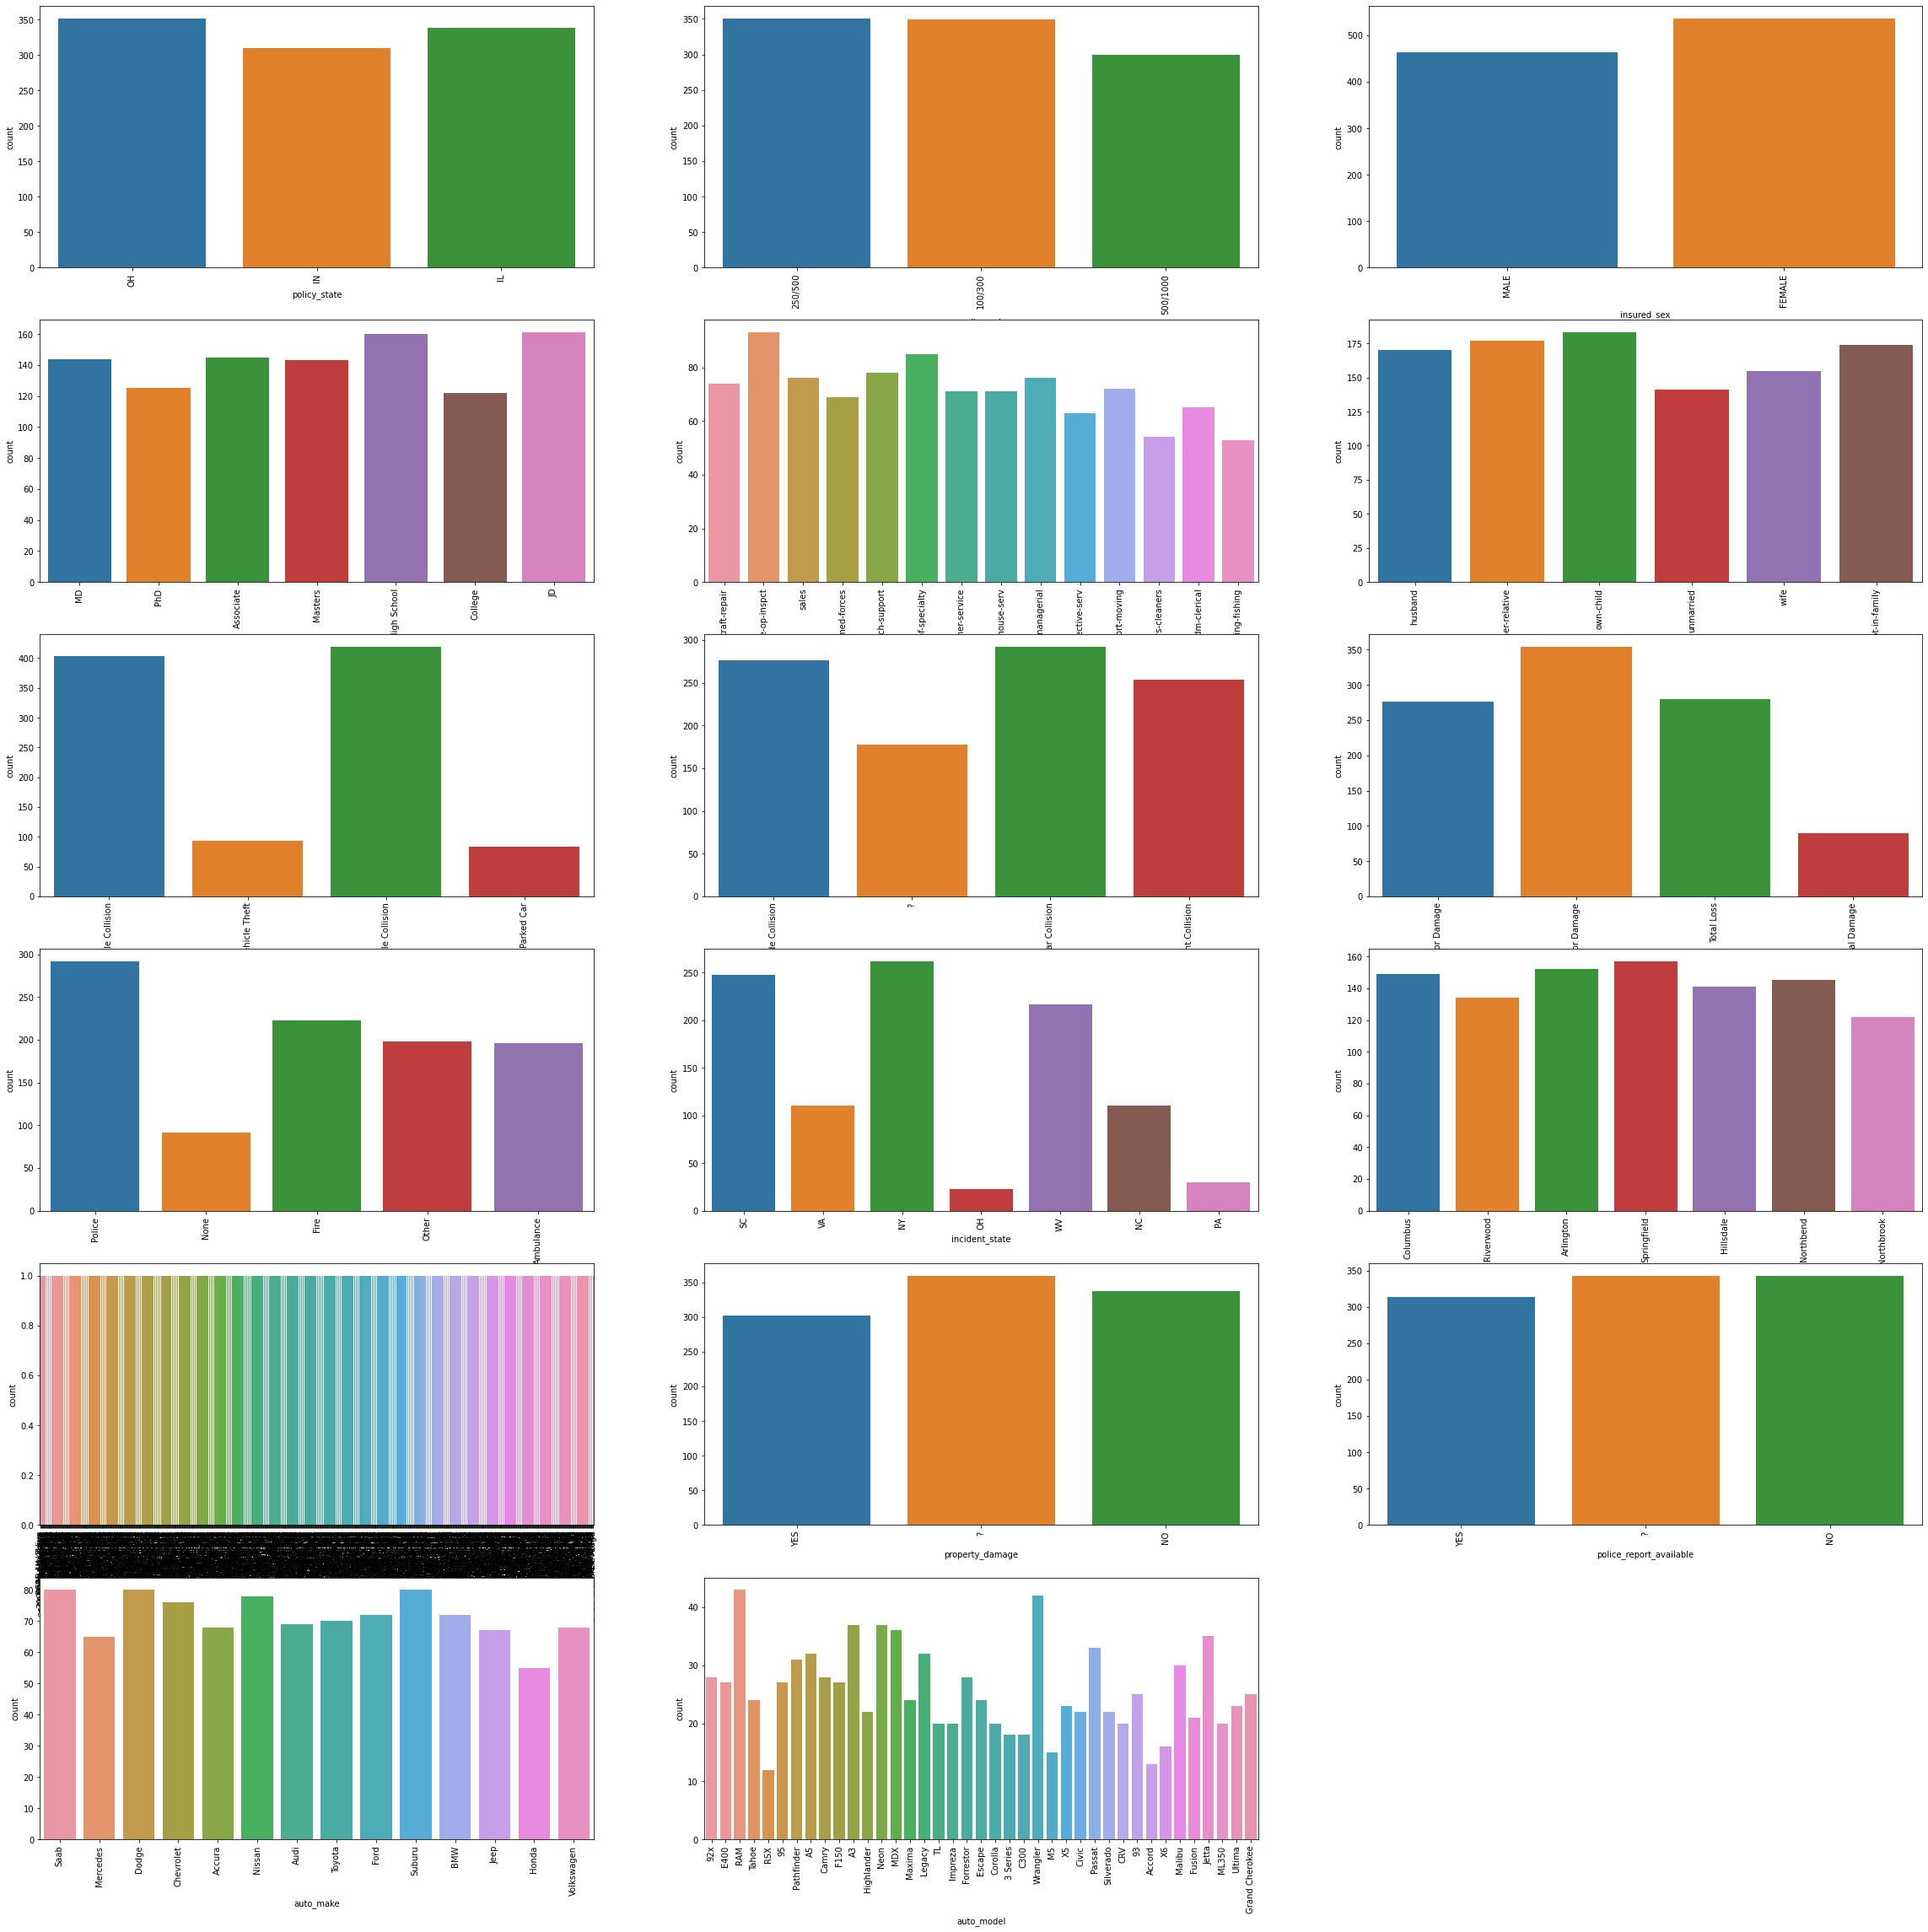

In [111]:
plt.figure(figsize = (40,40))
n = 1

for i in categorical:
    ax = plt.subplot(6,3,n)
    sns.countplot(df[i]) 
    plt.xticks(rotation=90)
    n+=1
plt.show()

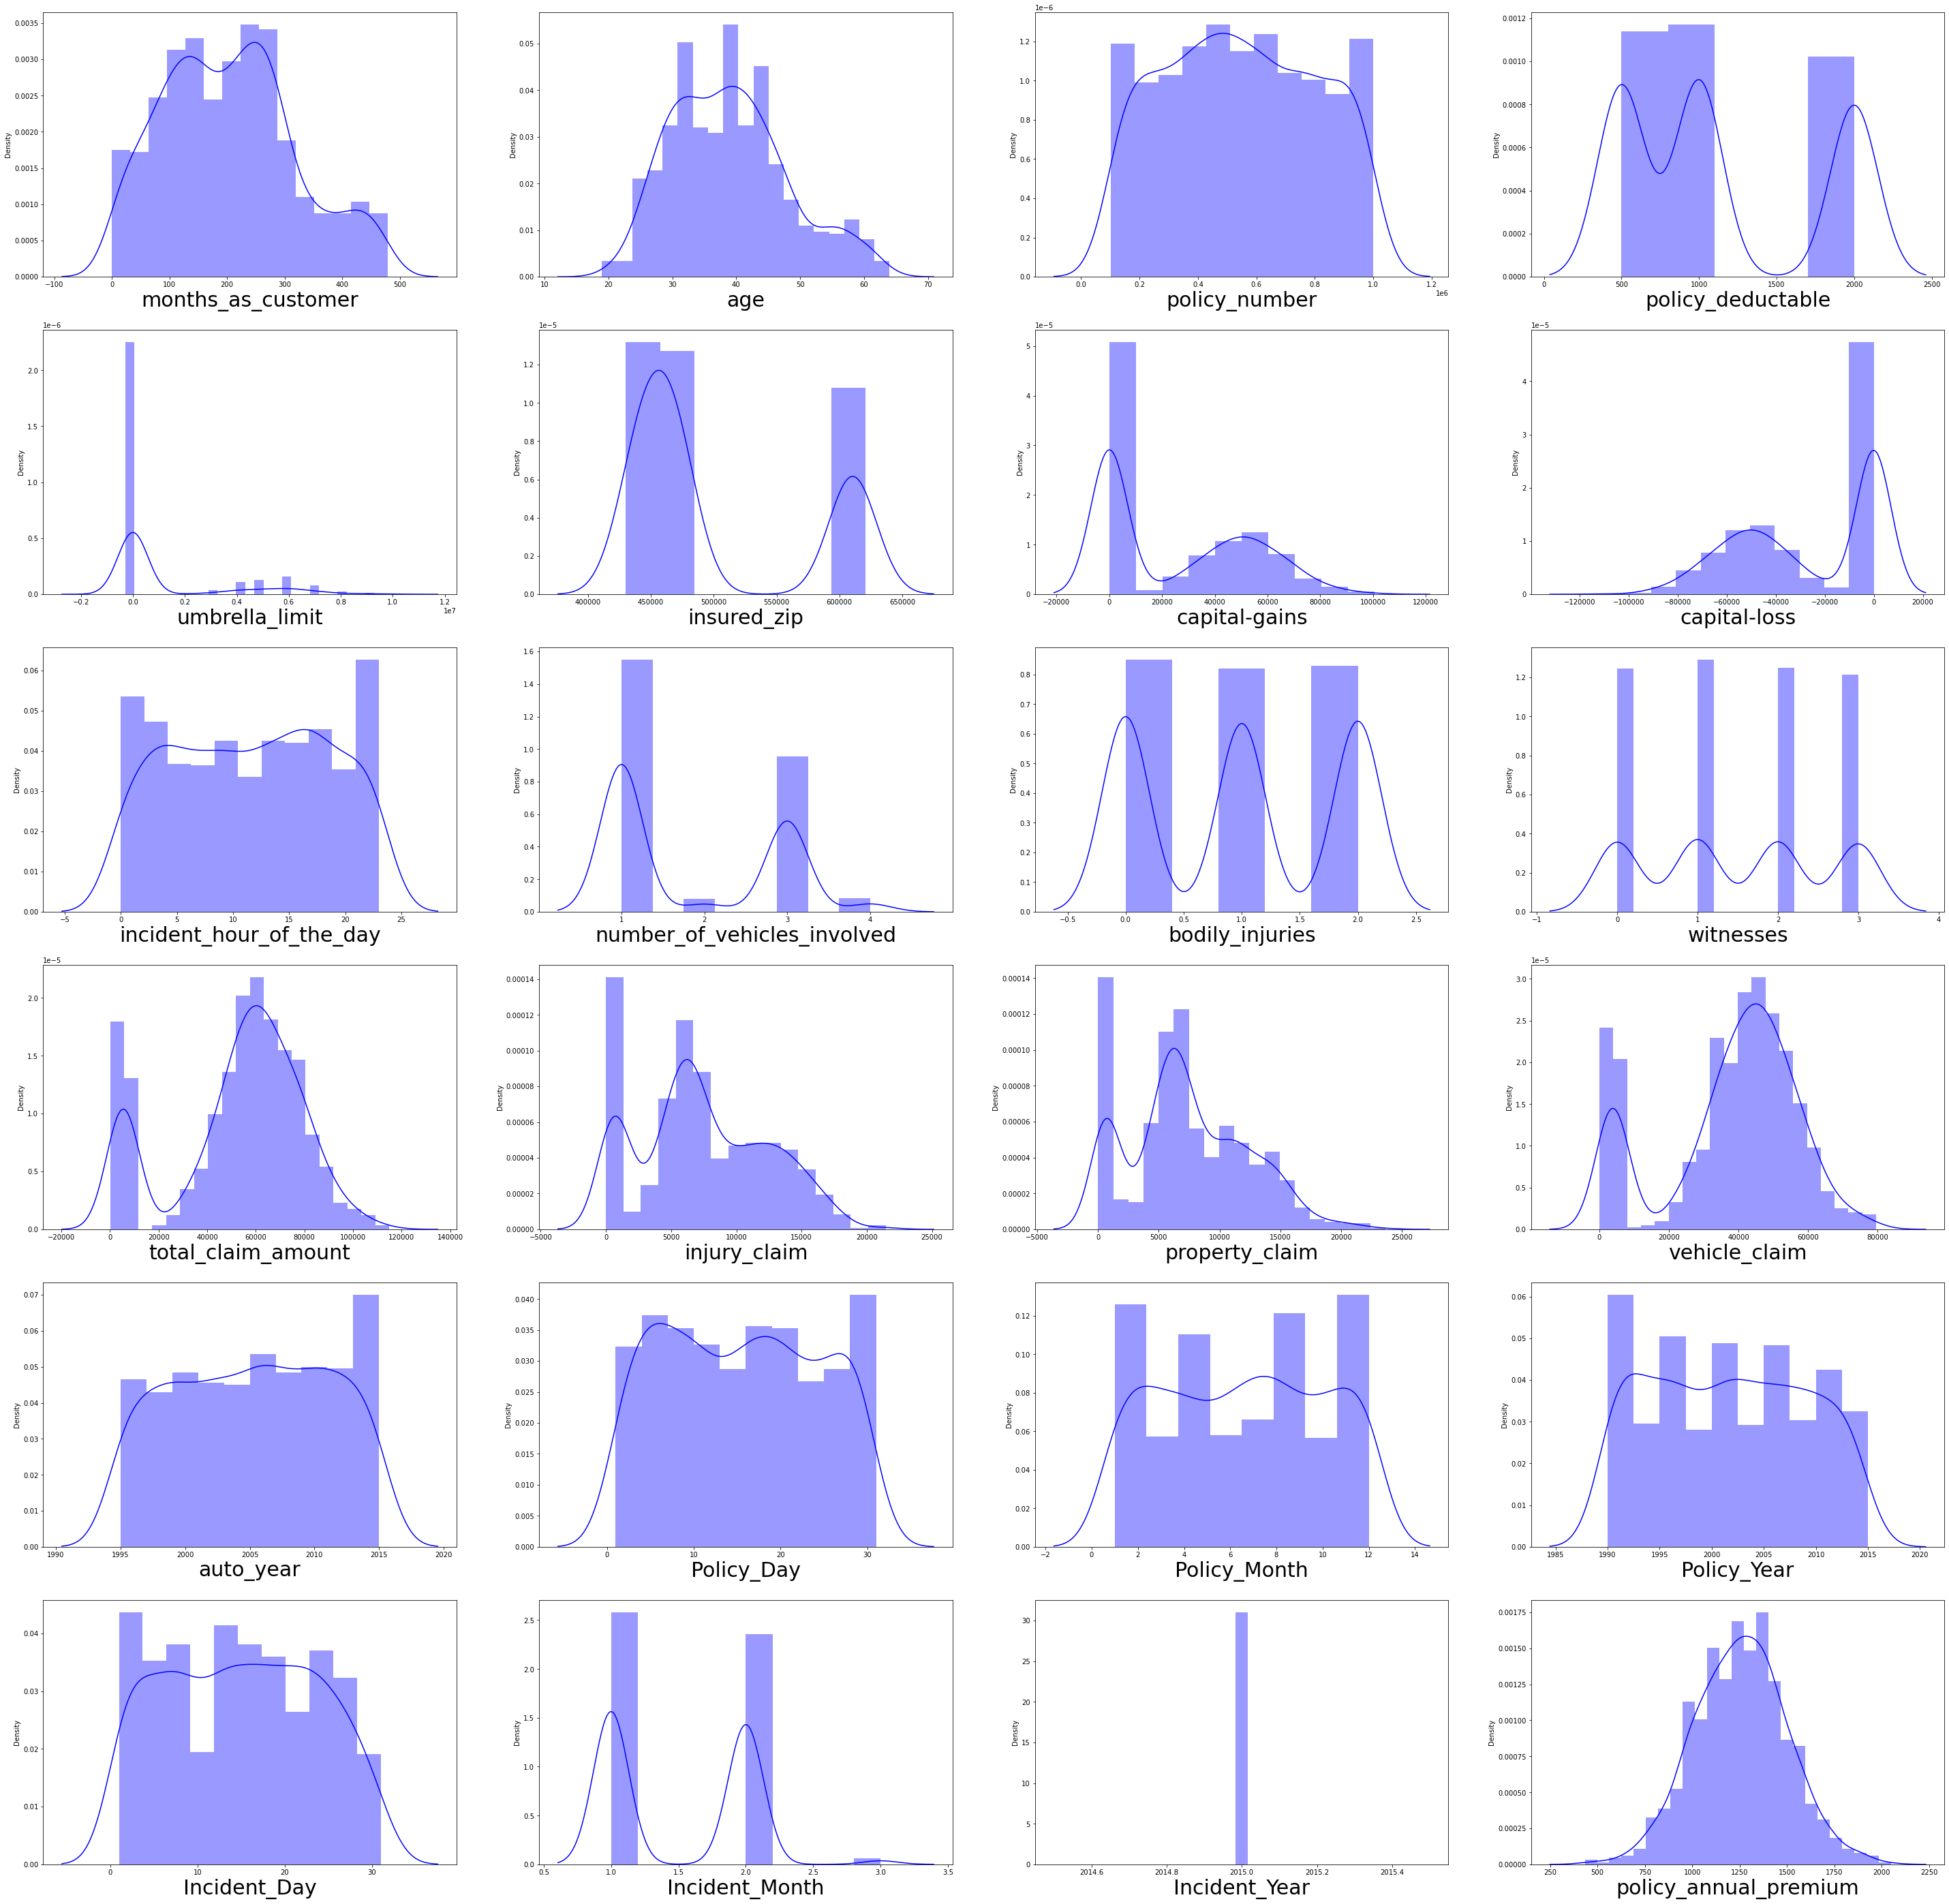

In [112]:
#Visualize the data distribution
plt.figure(figsize = (50,50))
n = 1

for i in numerical:
    ax = plt.subplot(6,4,n)
    sns.distplot(df[i], color = 'blue')
    plt.xlabel(i,fontsize=30)
        
    n+=1
plt.show()

We can drop Incident_Year feature as it contans all same year 2015 and umbrella_limit looks like more skewed

In [113]:
df.drop('Incident_Year',axis=1,inplace=True)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

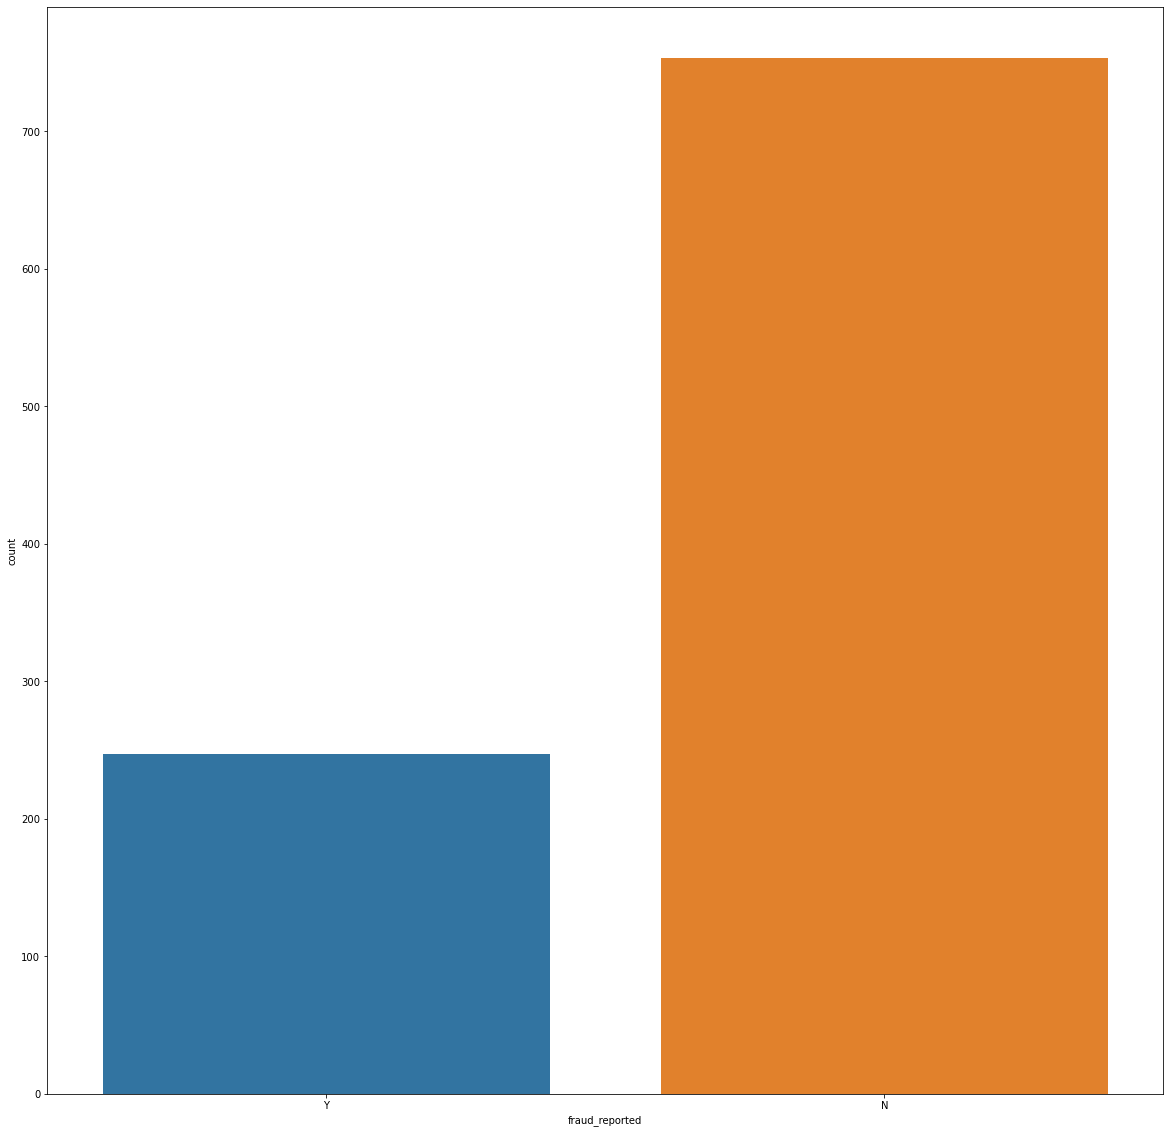

In [114]:
plt.figure(figsize = (20,20))
sns.countplot(df['fraud_reported'])

In [115]:
df['fraud_reported'].replace({'N':0,'Y':1},inplace=True)

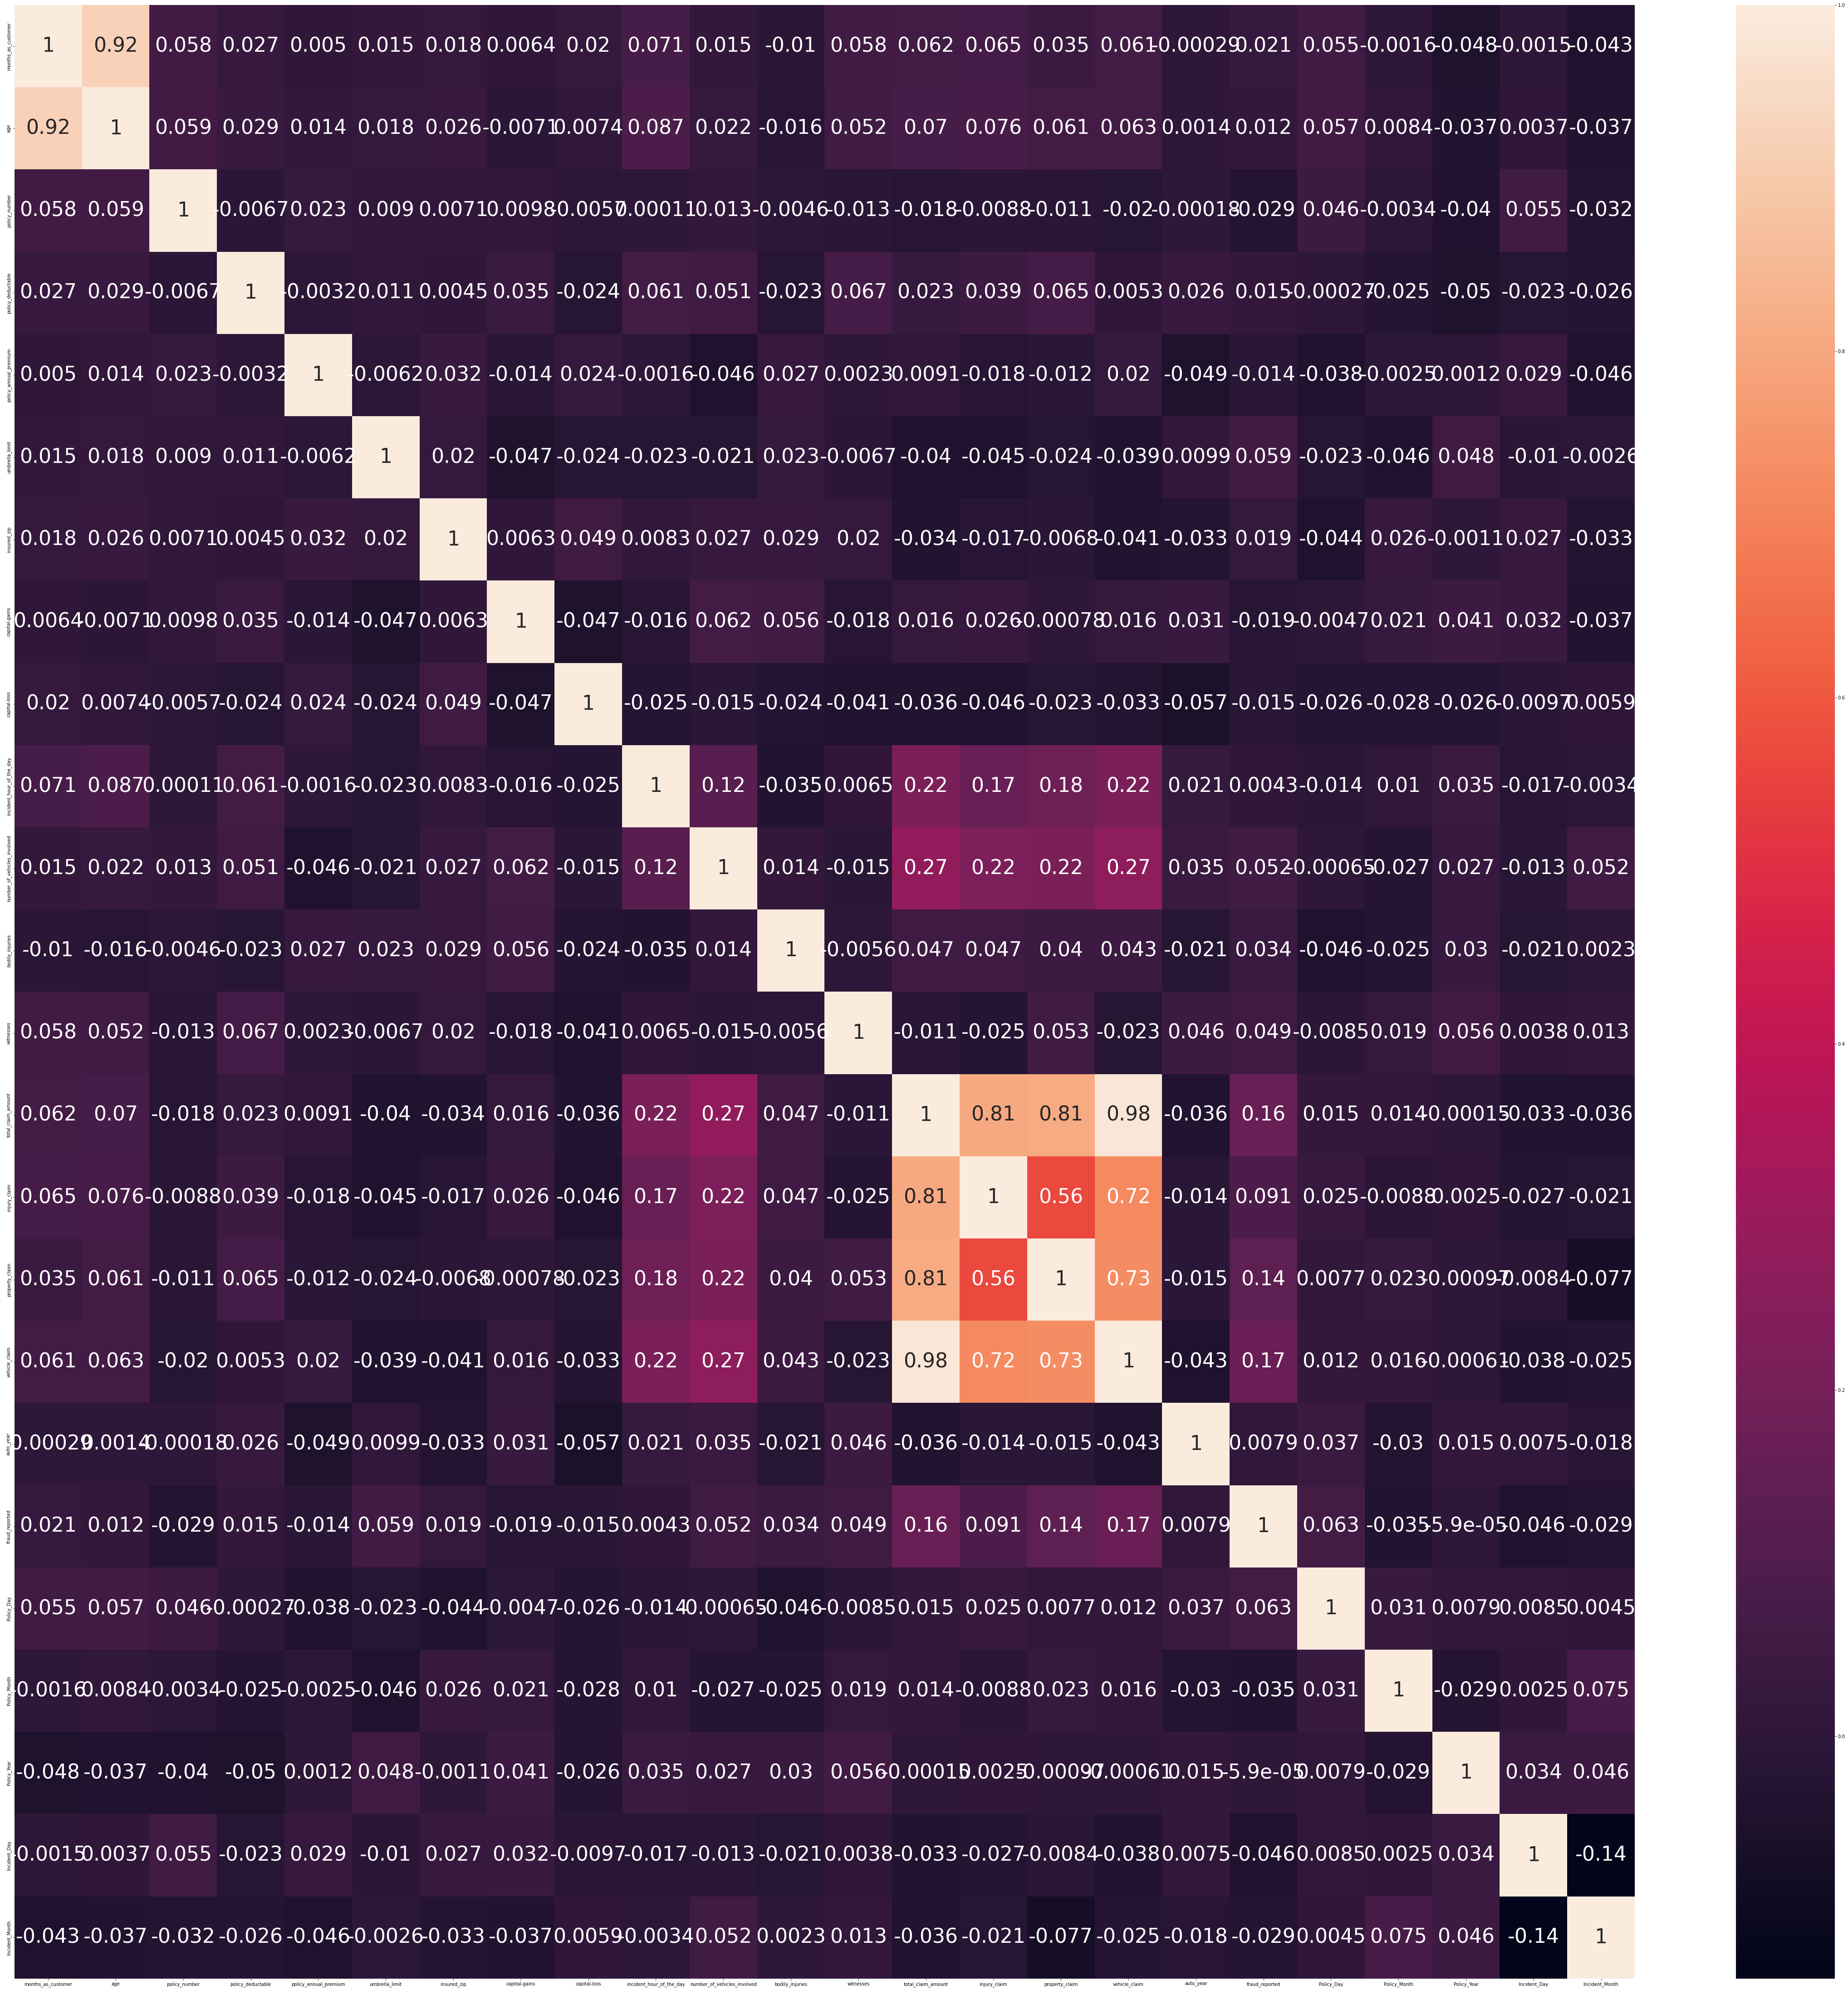

In [116]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df.corr()
plt.figure(figsize=(80,80))
sns.heatmap(df_corr,annot=True,annot_kws={'size':44})
plt.show()

Looks like vehicle_claim and total_claim_amount are highly correlated, let us visualize and check

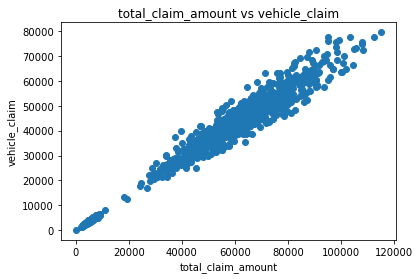

In [117]:
# Check if they are really related
plt.scatter(df['total_claim_amount'],df['vehicle_claim'])
plt.xlabel('total_claim_amount')
plt.ylabel('vehicle_claim')
plt.title('total_claim_amount vs vehicle_claim')
plt.show()

In [ ]:
It is confirmed that vehicle_claim and total_cliam_amount are closed related so we can drop total_cliam_amount feature 

And also policy_number is nominal data which can be deleted

In [118]:
df.drop(['total_claim_amount','policy_number'],axis=1,inplace=True)
numerical.remove('total_claim_amount')
numerical.remove('Incident_Year')
numerical.remove('policy_number')

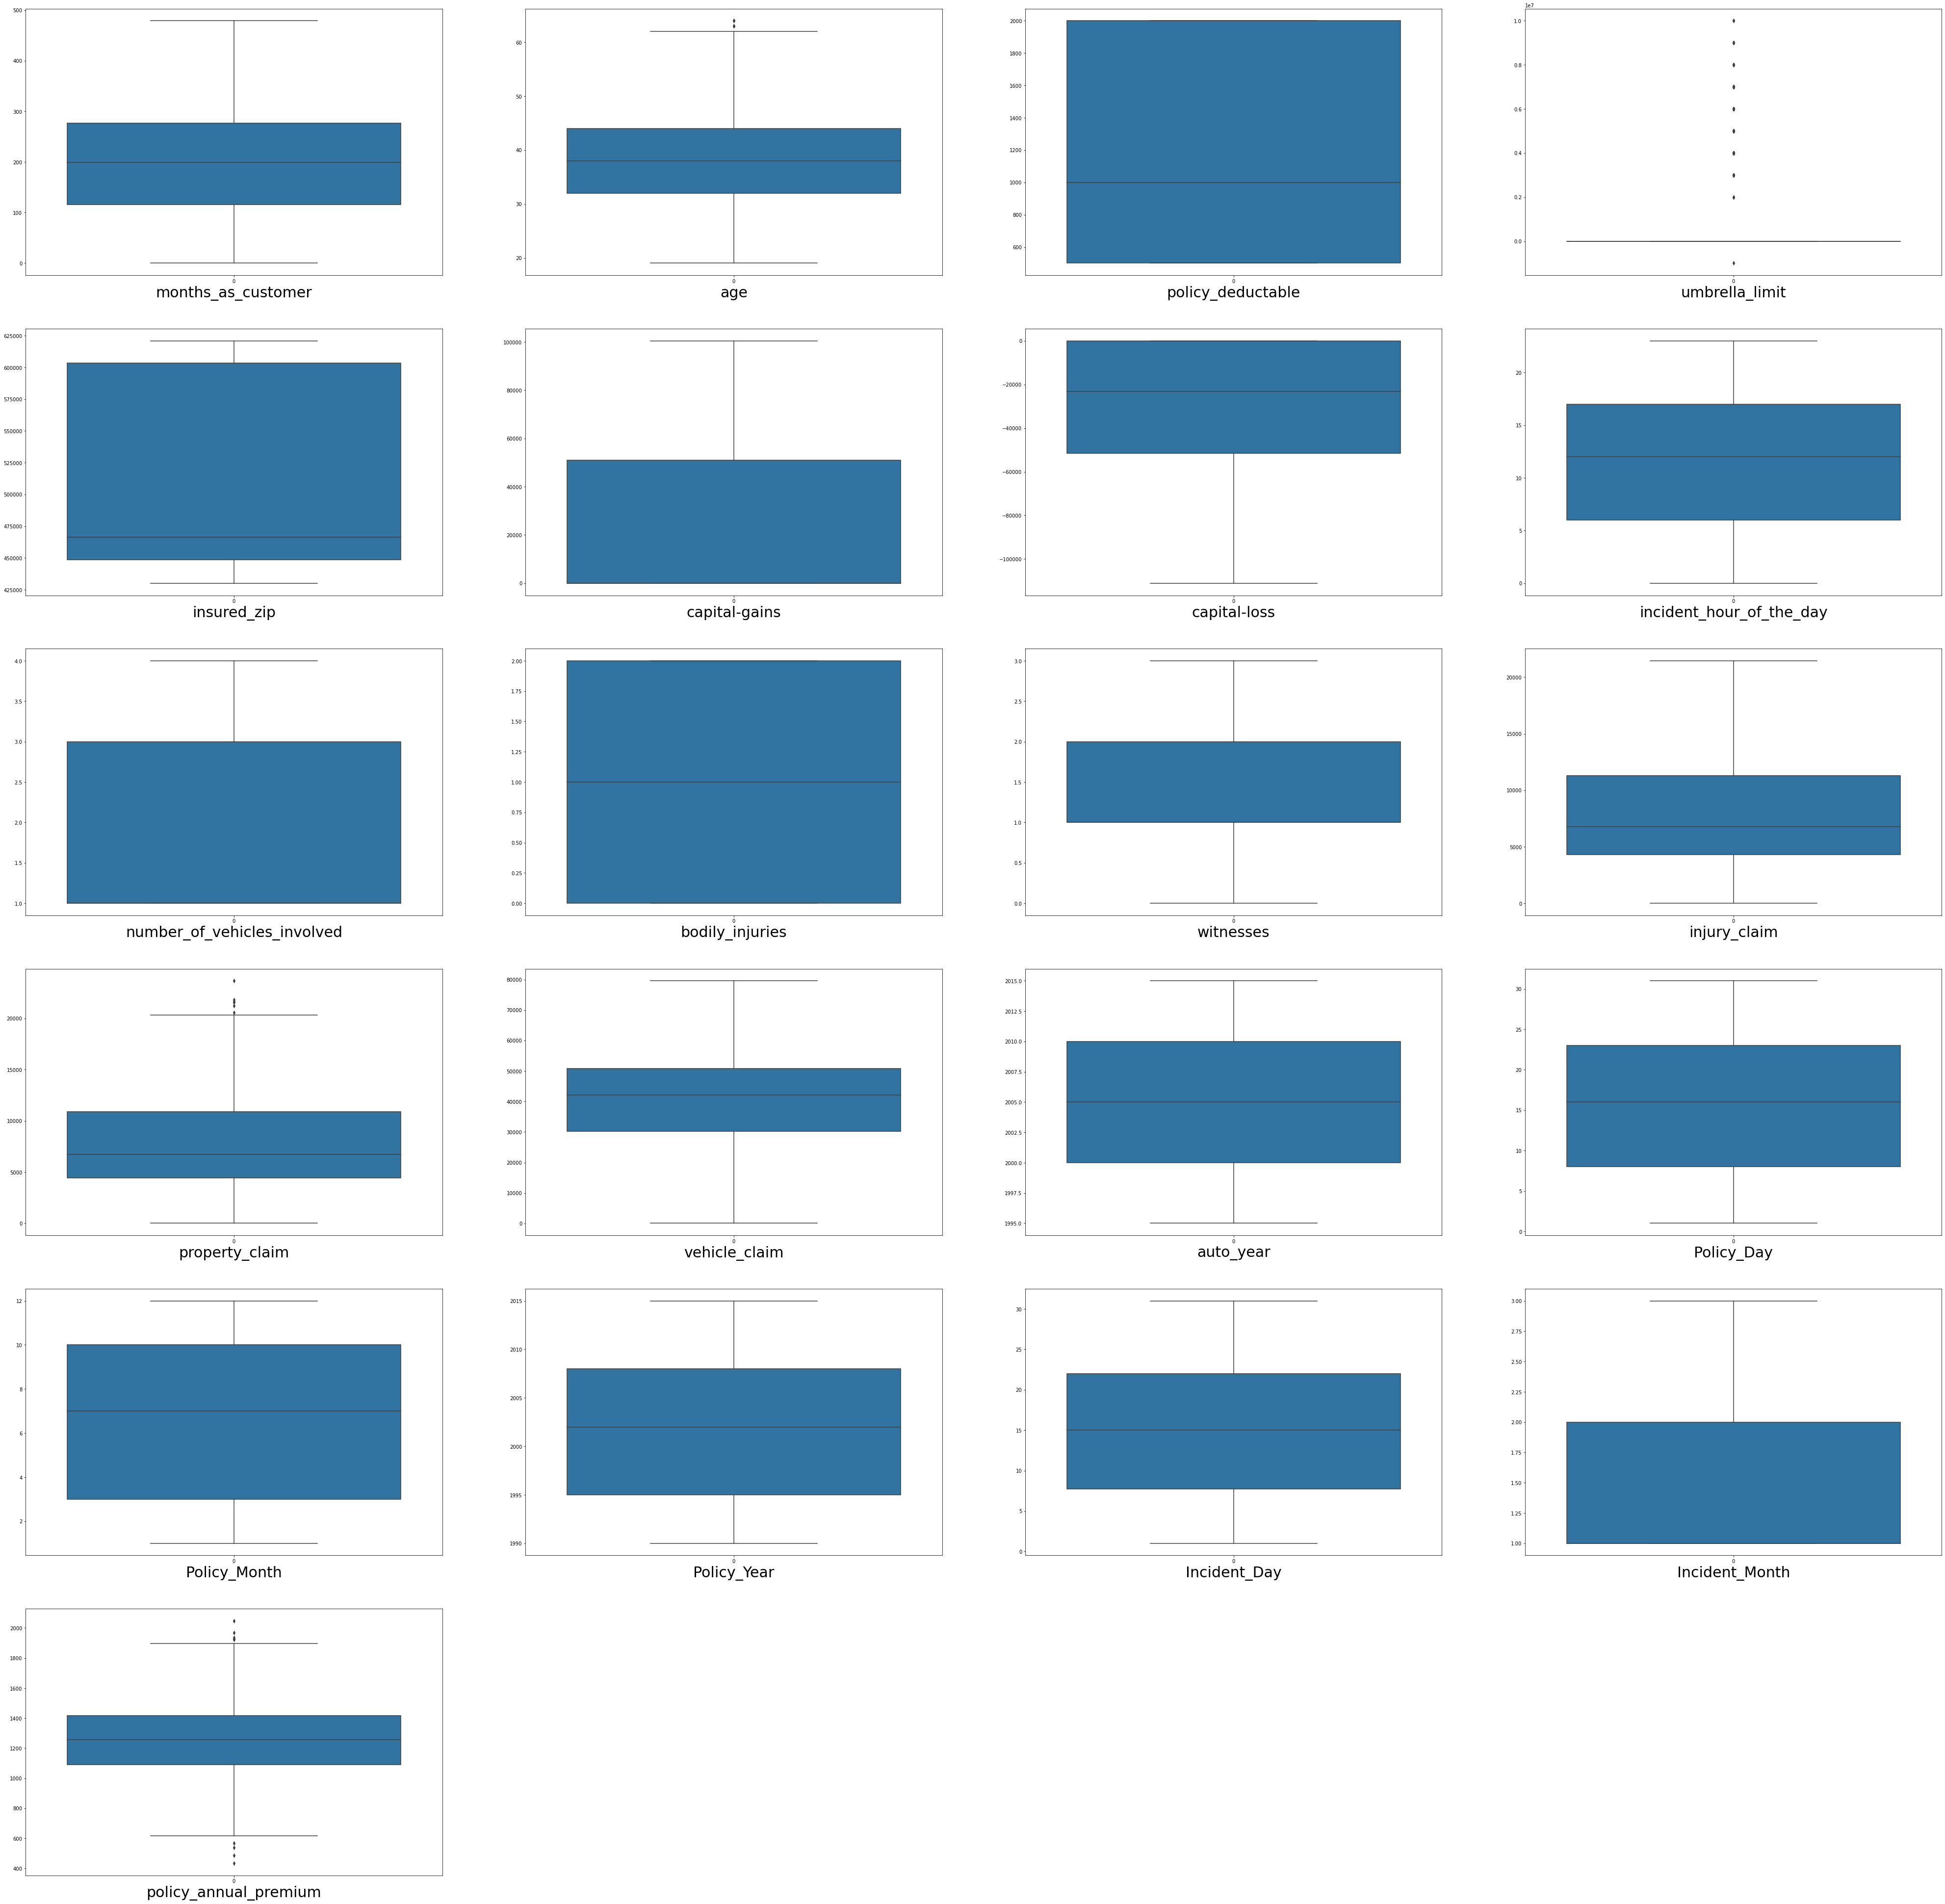

In [119]:
#Let's visualize the data using boxplot
plt.figure(figsize=(70,70))
n=1
for i in numerical:
    ax=plt.subplot(6,4,n)
    sns.boxplot(data=df[i],orient='v')
    plt.xlabel(i,fontsize=30)
    n+=1
plt.show()

In [ ]:
There are outliers in umbrella_limit,property_claim and policy_annual_premium features.

We shall not remove outliers in umbrella_limit as many people will not hold umbrella limit since this is extra coverage which is optional

In [120]:
#Outliers removal using zscore method
from scipy.stats import zscore
#Features having outliers
features=df[['property_claim','policy_annual_premium']]
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,Incident_Day,Incident_Month
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,52080,Saab,92x,2004,1,17,10,2014,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,3510,Mercedes,E400,2007,1,27,6,2006,21,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,23100,Dodge,RAM,2007,0,6,9,2000,22,2
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,50720,Chevrolet,Tahoe,2014,1,25,5,1990,10,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,4550,Accura,RSX,2009,0,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,61040,Honda,Accord,2006,0,16,7,1991,22,2
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,72320,Volkswagen,Passat,2015,0,5,1,2014,24,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,52500,Suburu,Impreza,1996,0,17,2,2003,23,1
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,36540,Audi,A5,1998,0,18,11,2011,26,2


In [121]:
#Checking shape of new dataset
df_new.shape

(996, 39)

In [122]:
#Checking dataloss
Dataloss = (((1000-996)/1000)*100)
print(Dataloss)

0.4


So, I can see 0.4% dataloss.I feel it is ok

In [124]:
le = LabelEncoder()
for i in categorical:
    df_new[i] = le.fit_transform(df_new[i])

In [125]:
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,Incident_Day,Incident_Month
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,3510,8,12,2007,1,27,6,2006,21,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,23100,4,30,2007,0,6,9,2000,22,2
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,50720,3,34,2014,1,25,5,1990,10,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,4550,0,31,2009,0,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,5,...,61040,6,6,2006,0,16,7,1991,22,2
996,285,41,0,0,1000,1436.79,0,608177,0,6,...,72320,13,28,2015,0,5,1,2014,24,1
997,130,34,2,1,500,1383.49,3000000,442797,0,5,...,52500,11,19,1996,0,17,2,2003,23,1
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,...,36540,1,5,1998,0,18,11,2011,26,2


In [127]:
x = df_new.drop('fraud_reported',axis=1)
y = df_new.fraud_reported

In [128]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [129]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_Day,Policy_Month,Policy_Year,Incident_Day,Incident_Month
0,1.074671,0.987190,1.186130,0.063660,-0.224722,0.621371,-0.480660,-0.486746,1.075102,0.531088,...,1.174449,0.750488,0.857248,-1.644810,-0.182338,0.179080,0.980399,1.686176,1.153049,-0.951204
1,0.204846,0.330455,-0.018137,0.063660,1.409024,-0.251375,1.693441,-0.458176,1.075102,0.531088,...,-1.376935,-1.824061,0.360986,-0.657437,0.316587,1.315157,-0.163352,0.599693,0.690948,-0.951204
2,-0.612790,-1.092470,1.186130,-1.179582,1.409024,0.647301,1.693441,-0.982961,-0.930144,1.557206,...,-0.737005,-0.785654,-0.631538,0.958263,0.316587,-1.070604,0.694461,-0.215170,0.806473,0.958875
3,0.448397,0.221000,-1.222403,0.063660,1.409024,0.658123,2.128261,1.497902,-0.930144,1.557206,...,-0.217973,0.678398,-0.879669,1.317308,1.480744,1.087942,-0.449290,-1.573274,-0.579830,-0.951204
4,0.204846,0.549367,-1.222403,1.306902,-0.224722,1.358059,2.128261,1.534091,1.075102,-1.521148,...,-1.404033,-1.768934,-1.624063,1.048024,0.649203,-1.070604,-0.163352,1.686176,0.228847,0.958875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,-1.752261,-0.107368,1.186130,1.306902,-0.224722,0.221354,-0.480660,-0.973777,-0.930144,1.044147,...,0.278129,1.225430,-0.135276,-1.196004,0.150278,0.065473,0.122586,-1.437463,0.806473,0.958875
992,0.700646,0.221000,-1.222403,-1.179582,-0.224722,0.745734,-0.480660,1.498741,-0.930144,1.557206,...,2.229188,1.823349,1.601641,0.778741,1.647052,-1.184212,-1.593041,1.686176,1.037523,-0.951204
993,-0.647583,-0.545191,1.186130,0.063660,-1.041595,0.523896,0.823801,-0.812920,-0.930144,1.044147,...,0.023825,0.772751,1.105379,-0.029109,-1.512803,0.179080,-1.307103,0.192262,0.921998,-0.951204
994,2.205443,2.519571,-1.222403,1.306902,1.409024,0.413309,1.693441,-0.828058,1.075102,-1.521148,...,-0.451433,-0.073241,-1.375932,-1.285765,-1.180187,0.292688,1.266337,1.278745,1.268574,0.958875


In [130]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=34)

In [134]:
#Creating objects for data models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()

In [135]:
for i in [lr,dt,knn,rf,ab]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("classification_report:",classification_report(y_test,pred,digits=2))
    print('-------------------------------------------')

LogisticRegression()
classification_report:               precision    recall  f1-score   support

           0       0.78      0.91      0.84       186
           1       0.48      0.25      0.33        63

    accuracy                           0.74       249
   macro avg       0.63      0.58      0.59       249
weighted avg       0.71      0.74      0.71       249

-------------------------------------------
DecisionTreeClassifier()
classification_report:               precision    recall  f1-score   support

           0       0.80      0.76      0.78       186
           1       0.38      0.44      0.41        63

    accuracy                           0.68       249
   macro avg       0.59      0.60      0.60       249
weighted avg       0.70      0.68      0.69       249

-------------------------------------------
KNeighborsClassifier()
classification_report:               precision    recall  f1-score   support

           0       0.77      0.93      0.84       186
           

Looks like AdaBoostClassifier and RandomForestClassifier are giving good results

### Cross validation
let us cross validate the accuracy

In [136]:
for i in range(2,9):
    print(cross_val_score(rf,x_scaled,y,cv=i).mean())

0.7650602409638554
0.7781124497991968
0.7761044176706828
0.7720954773869346
0.786144578313253
0.7801353576001463
0.7911935483870968


In [137]:
for i in range(2,9):
    print(cross_val_score(ab,x_scaled,y,cv=i).mean())

0.7700803212851406
0.753012048192771
0.7690763052208835
0.7700854271356784
0.7710843373493975
0.778193637348567
0.7791935483870968


### Hypertuning

In [138]:
params = { 'n_estimators':[13,15],'criterion':['gini','entropy'],'max_depth':range(10,20,2),'min_samples_leaf':range(5,20,5),'min_samples_split':range(10,30,5)}
grid_search = GridSearchCV(rf,param_grid=params)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 13}

In [139]:
rfc=RandomForestClassifier(n_estimators=13,criterion='gini',max_depth=14,min_samples_leaf=5,min_samples_split=15)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       186
           1       0.54      0.24      0.33        63

    accuracy                           0.76       249
   macro avg       0.66      0.58      0.59       249
weighted avg       0.72      0.76      0.72       249



In [141]:
params = { 'n_estimators':[50,60,70],'learning_rate':[1,3,5],'random_state':[None,4,6]}
grid_search = GridSearchCV(ab,param_grid=params)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'learning_rate': 1, 'n_estimators': 60, 'random_state': None}

In [142]:
abc=AdaBoostClassifier(n_estimators=60,learning_rate=1,random_state=None)
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print(classification_report(y_test,abc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       186
           1       0.53      0.38      0.44        63

    accuracy                           0.76       249
   macro avg       0.67      0.63      0.65       249
weighted avg       0.74      0.76      0.74       249



There is no improvement after hyperparameter tuning, so will go with RandomForestClassifier model with default parameters

### Saving the final model and testing the data using loaded model

In [143]:
# save the model to disk
filename = 'Insurance_Fraud_Detection_Model.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
data = pd.DataFrame({"Actual":y_test,"Predicted":result})
data

,Actual,Predicted
220,1,0
866,0,0
169,0,0
658,0,0
138,0,0
...,...,...
389,0,0
803,1,0
523,0,0
765,0,0
